<a href="https://colab.research.google.com/github/irfannhkm/PCVK_GANJIL_24-25/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 8 – Morfologi (Erosi, Dilasi, Opening, Closing, Transformasi Top-hat dan Bottom-hat, Skeleton, Thickening)


||
|----------------|--------------------------|
|Nama:|Muhammad Irfan Nur Hakim |
|Kelas:|TI-3F  |
|NIM:|2241620230|
|Absen:|`15`|


<h3 align="left">Connect with me:</h3>
<p align="left">
<a href="https://github.com/irfannhkm/PCVK_GANJIL_24-25" target="blank"><img align="center" src="https://raw.githubusercontent.com/rahuldkjain/github-profile-readme-generator/master/src/images/icons/Social/github.svg" alt="irfan.nhkm" height="30" width="40" /></a>

[LINK GITHUB](https://github.com/irfannhkm/PCVK_GANJIL_24-25)

[LINK GOOGLE COLAB](https://colab.research.google.com/drive/1kQtk1LaKCpNGHOPw6ls-n9E9fgcykqRB?usp=sharing)

## Langkah Praktikum

### Langkah 1: Import folder drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Langkah 2: Import library

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Langkah 3: Buatlah fungsi dilasi cross 3 x 3 tanpa menggunakan library morphology

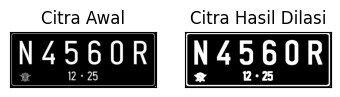

In [3]:
#Dilasi tanpa library

def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= np.ones((w,w), dtype=np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

img_d = cv2.imread('/content/drive/MyDrive/PCVK/platnomer.jpg',0) #
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)

# Memanggil fungsi dilasi_citra
w=5
imgD = dilasi_citra(thresh, w)

# Menampilkan hasil citra
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

### Langkah 4: operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology

[[1 1 1]
 [1 1 1]
 [1 1 1]]


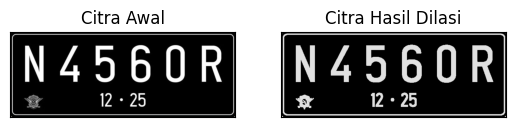

In [4]:
img = cv2.imread('/content/drive/MyDrive/PCVK/platnomer.jpg')

#img = cv2.imread('morp.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)
print(kernel)

# Menampilkan hasil
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

### Langkah 5: Buatlah program implementasi operasi dilasi cross 3 x 3 dengan menggunakan library morphology

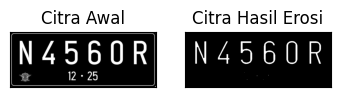

In [5]:
#Erosi Tanpa Library
def erosi_citra(F,k):
  #size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE= np.ones((k,k), dtype=np.uint8)
  constant= (k-1)//2
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):

      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]

      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE

img_e= cv2.imread('/content/drive/MyDrive/PCVK/platnomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 175, 225,
cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

# Menampilkan hasil
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

### Langkah 6: Buatlah program implementasi operasi dilasi square 5 x 5 dengan menggunakan library morphology

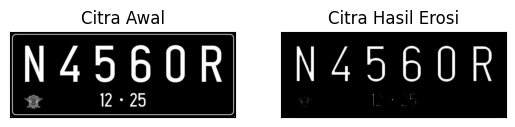

In [6]:
#EROSI LIBRARY
img = cv2.imread('/content/drive/MyDrive/PCVK/platnomer.jpg')
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

### Langkah 7a: Operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology

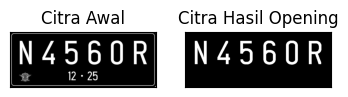

In [7]:
img_o= cv2.imread('/content/drive/MyDrive/PCVK/platnomer.jpg',0)
reto, thresho = cv2.threshold(img_o, 127, 225, cv2.THRESH_BINARY)

k=7
imgO = dilasi_citra(erosi_citra(thresho,k),k)

# Menampilkan hasil
plt.subplot(131),plt.imshow(img_o,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

### Langkah 7b: Operasi opening dengan Structuring Element berbentuk square 3 x 3 dengan menggunakan library morphology

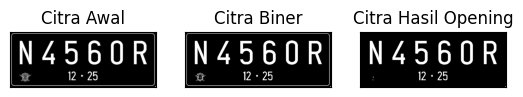

In [8]:
# Dengan menggunakan library
img = cv2.imread('/content/drive/MyDrive/PCVK/platnomer.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)

# Menampilkan hasil
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]),
plt.yticks([])
plt.show()

### Langkah 8a: Operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa menggunakan library morphology

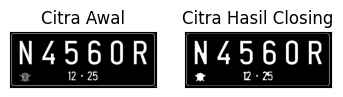

In [9]:
img_c = cv2.imread('/content/drive/MyDrive/PCVK/platnomer.jpg',0)
retc, threshc = cv2.threshold(img_c, 127, 225,cv2.THRESH_BINARY)
k=7
imgC = erosi_citra(dilasi_citra(threshc,k),k)
plt.subplot(131),plt.imshow(img_c,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]),
plt.yticks([])
plt.show()

### Langkah 8b: Operasi closing dengan Structuring Element berbentuk square 3 x 3 dengan menggunakan library morphology

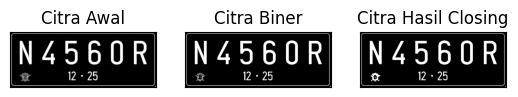

In [10]:
img = cv2.imread('/content/drive/MyDrive/PCVK/platnomer.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

### Langkah 9: operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5

SED = Cross 3 x 3


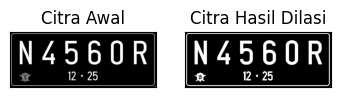

SED = Cross 5 x 5


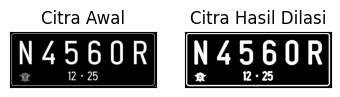

In [11]:
#Dilasi Cross SED
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED= np.array([[0,1,0],
                [1,1,1],
                [0,1,0]], dtype=np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

#Menampilkan hasil
print('SED = Cross 3 x 3')
img_d = cv2.imread('/content/drive/MyDrive/PCVK/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh, w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.yticks([])
plt.show()

def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED = np.array([[0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0],
                [1, 1, 1, 1, 1],
                [0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

#Menampilkan hasil
print('SED = Cross 5 x 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

### Langkah 10: operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5

SED = Circular 3 x 3


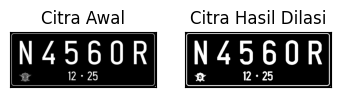

SED = Circular 5 x 5


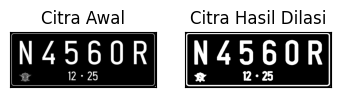

In [12]:
#Dilasi Circular SED
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2

  #Proses dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Circular 3 x 3')
img_d = cv2.imread('/content/drive/MyDrive/PCVK/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh, w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt
plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SED = Circular 5 x 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)
plt
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

### Langkah 11: operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7

SE = Rectangle 3x5


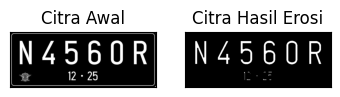

SE = Rectangle 5x7


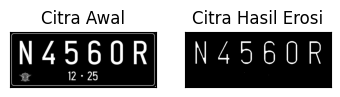

In [13]:
#Erosi Cross SE

def erosi_citra(F,p,l):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2
  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE

print('SE = Rectangle 3x5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/platnomer.jpg',0) #

ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Rectangle 5x7')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/platnomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()


### Langkah 12: operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5

SE = Line Vertikal 3


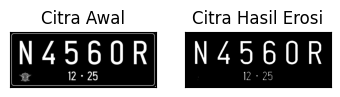

SE = Line Vertikal 5


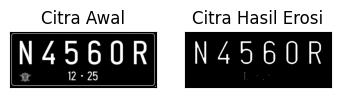

In [14]:
#Erosi Line Vertikal SE
def erosi_citra(F,k):
  #size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k)) #SE line vertikal
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE

print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/platnomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/platnomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()



### Langkah 13: Top Hat

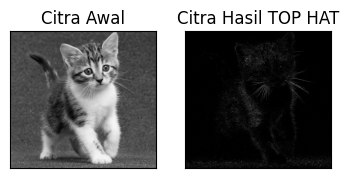

In [15]:
# Getting the kernel to be used in Top-Hat
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel)

#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

### Langkah 14: BlackHat

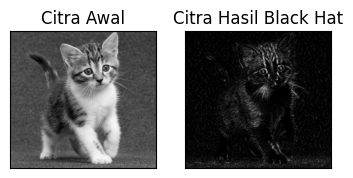

In [16]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
#tophat_img = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)
#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

### Langkah 15: Skeleton

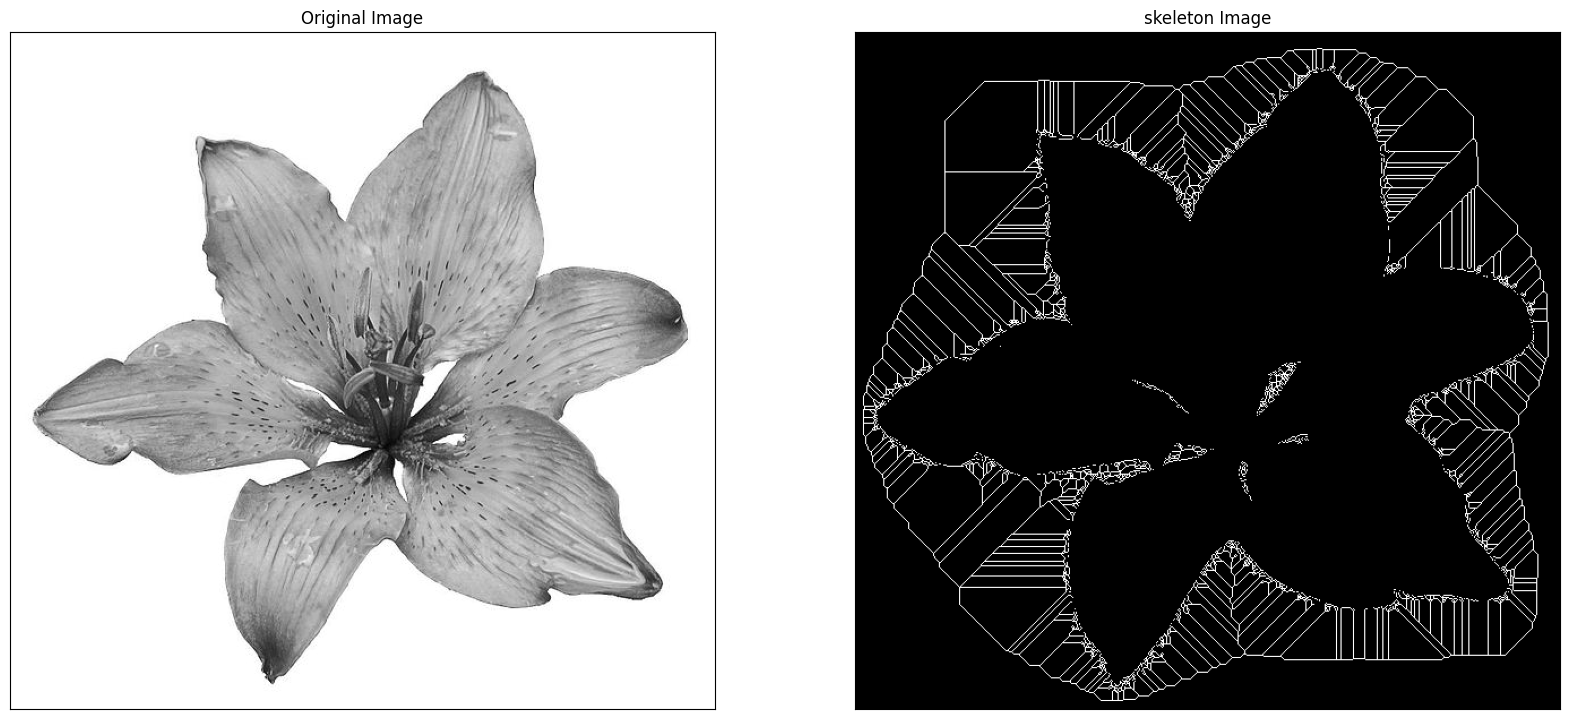

In [17]:
import cv2
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = cv2.imread('/content/drive/MyDrive/PCVK/lily.jpg',0)

binary = img > filters.threshold_triangle(img)

# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images
plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])

plt.savefig("binary and bin_skeleton.png")
plt.show()

### Langkah 16: Skeleton Inverse

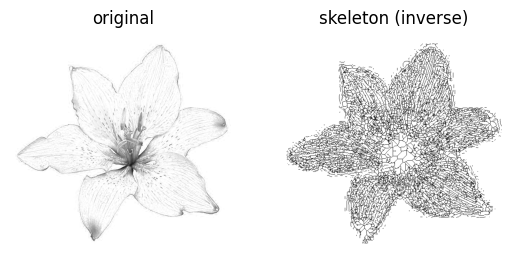

In [18]:
from skimage import io
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = io.imread('/content/drive/MyDrive/PCVK/lily.jpg')[...,0]

# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)
# skeletonize image
skeleton = skeletonize(binary)
# print images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()
# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()
plt.show()

### Langkah 17: Thickening

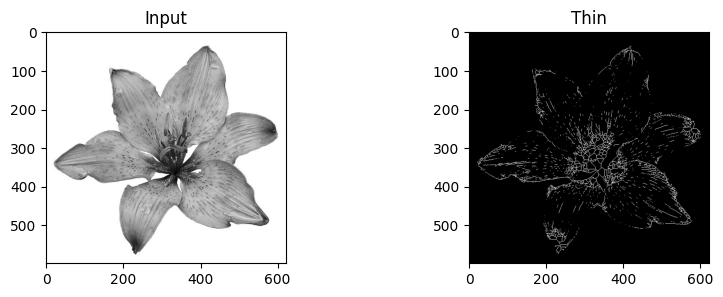

In [19]:
from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))
ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')
plt.savefig('/tmp/char_out.png')
plt.show()

## Tugas Praktikum
---
Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam
Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam
modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya
adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut.

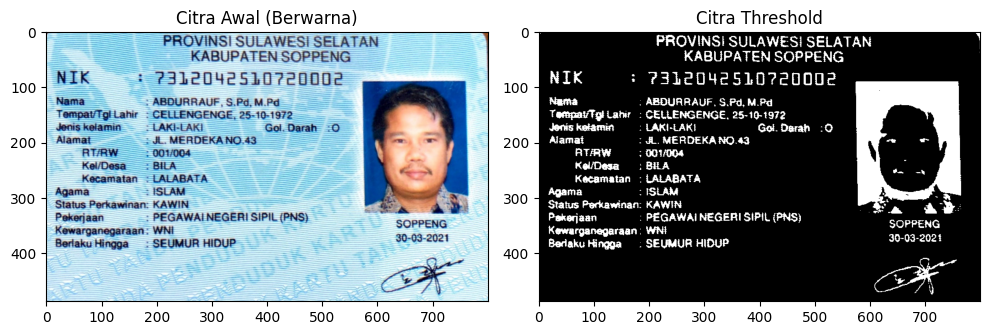

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Muat citra KTP dalam format warna untuk ditampilkan
img_color = cv2.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg')  # Citra berwarna
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)  # Ubah dari BGR ke RGB

# Membaca gambar dalam grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Thresholding untuk meningkatkan kontras

# Muat citra KTP dalam format grayscale untuk pemrosesan
img_gray = cv2.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg', 0)  # Citra grayscale
_, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)

# Menampilkan citra berwarna dan citra threshold secara horizontal
plt.figure(figsize=(10, 5))

# Menampilkan citra berwarna
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Citra Awal (Berwarna)")

# Menampilkan citra threshold
plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.tight_layout()  # Mengatur layout agar rapi
plt.show()

### Operasi Dilasi

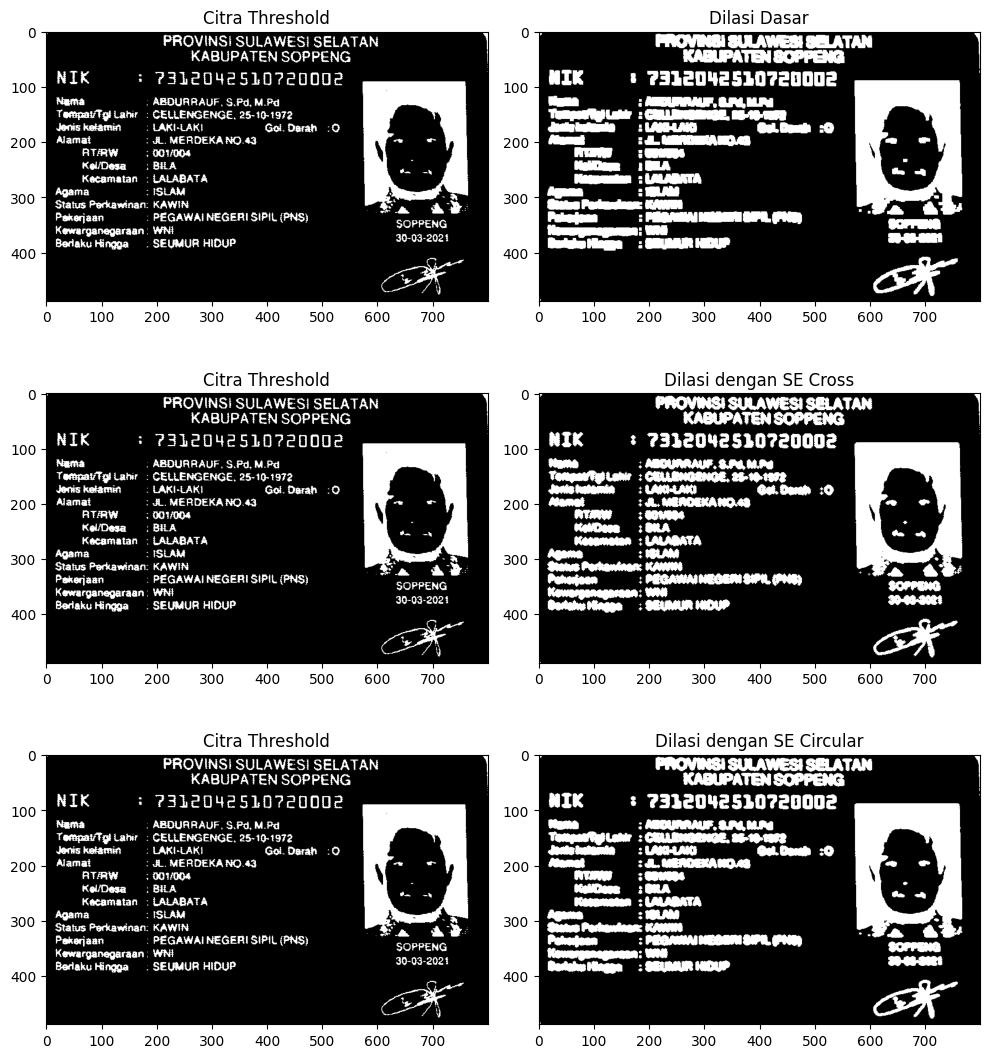

In [36]:
# Mengatur kernel untuk berbagai operasi dilasi
kernel = np.ones((5, 5), np.uint8)
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
kernel_circular = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Melakukan dilasi
dilated = cv2.dilate(thresh, kernel, iterations=1)
dilated_cross = cv2.dilate(thresh, kernel_cross, iterations=1)
dilated_circular = cv2.dilate(thresh, kernel_circular, iterations=1)

# Menampilkan hasil
plt.figure(figsize=(10, 11))

# Menampilkan citra threshold dan hasil dilasi dasar
plt.subplot(3, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(3, 2, 2)
plt.imshow(dilated, cmap='gray')
plt.title("Dilasi Dasar")

# Menampilkan citra threshold dan hasil dilasi dengan SE Cross
plt.subplot(3, 2, 3)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(3, 2, 4)
plt.imshow(dilated_cross, cmap='gray')
plt.title("Dilasi dengan SE Cross")

# Menampilkan citra threshold dan hasil dilasi dengan SE Circular
plt.subplot(3, 2, 5)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(3, 2, 6)
plt.imshow(dilated_circular, cmap='gray')
plt.title("Dilasi dengan SE Circular")

plt.tight_layout()  # Mengatur agar tampilan tidak bertumpuk
plt.show()

### Operasi Erosi

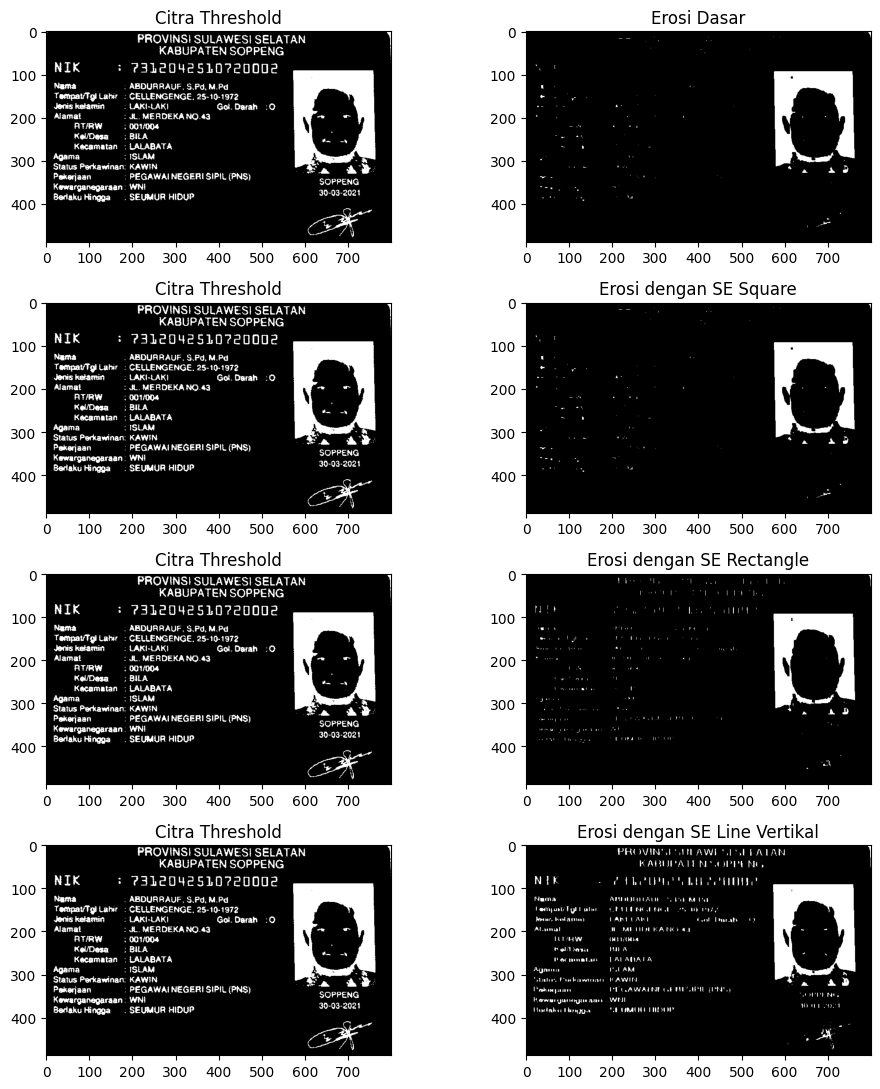

In [57]:
# Mengatur kernel untuk berbagai operasi erosi
kernel = np.ones((5, 5), np.uint8)  # Erosi dasar
kernel_square = np.ones((5, 5), np.uint8)  # Erosi dengan kernel square
kernel_rectangle = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 7))  # Erosi dengan kernel rectangle
kernel_line_vertical = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))  # Erosi dengan kernel line vertikal

# Melakukan erosi
eroded = cv2.erode(thresh, kernel, iterations=1)  # Erosi dasar
eroded_square = cv2.erode(thresh, kernel_square, iterations=1)  # Erosi dengan kernel square
eroded_rectangle = cv2.erode(thresh, kernel_rectangle, iterations=1)  # Erosi dengan kernel rectangle
eroded_line_vertical = cv2.erode(thresh, kernel_line_vertical, iterations=1)  # Erosi dengan kernel line vertikal

# Menampilkan hasil erosi
plt.figure(figsize=(10, 11))

# Menampilkan citra threshold dan hasil erosi dasar
plt.subplot(4, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(4, 2, 2)
plt.imshow(eroded, cmap='gray')
plt.title("Erosi Dasar")

# Menampilkan citra threshold dan hasil erosi dengan kernel square
plt.subplot(4, 2, 3)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(4, 2, 4)
plt.imshow(eroded_square, cmap='gray')
plt.title("Erosi dengan SE Square")

# Menampilkan citra threshold dan hasil erosi dengan kernel rectangle
plt.subplot(4, 2, 5)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(4, 2, 6)
plt.imshow(eroded_rectangle, cmap='gray')
plt.title("Erosi dengan SE Rectangle")

# Menampilkan citra threshold dan hasil erosi dengan kernel line vertikal
plt.subplot(4, 2, 7)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(4, 2, 8)
plt.imshow(eroded_line_vertical, cmap='gray')
plt.title("Erosi dengan SE Line Vertikal")

plt.tight_layout()  # Mengatur agar tampilan tidak bertumpuk
plt.show()

### Operasi Opening

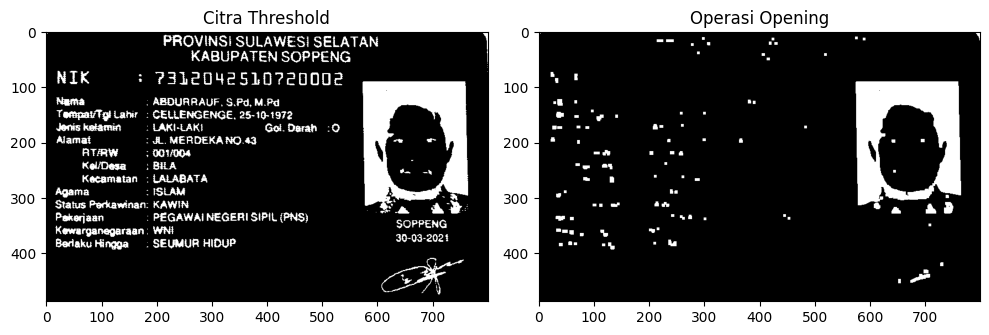

In [38]:
# Mengatur kernel untuk operasi Opening
kernel = np.ones((5, 5), np.uint8)

# Operasi Opening
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(1, 2, 2)
plt.imshow(opening, cmap='gray')
plt.title("Operasi Opening")

plt.tight_layout()
plt.show()

### Operasi Closing

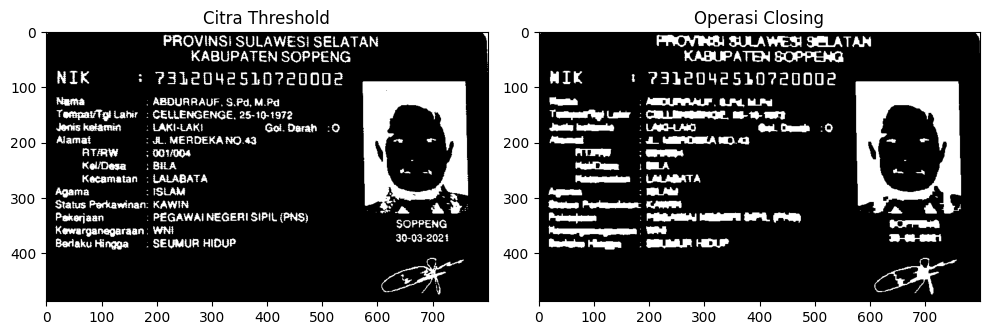

In [39]:
# Mengatur kernel untuk operasi Closing
kernel = np.ones((5, 5), np.uint8)

# Operasi Closing
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(1, 2, 2)
plt.imshow(closing, cmap='gray')
plt.title("Operasi Closing")

plt.tight_layout()
plt.show()

### Operasi Skeleton

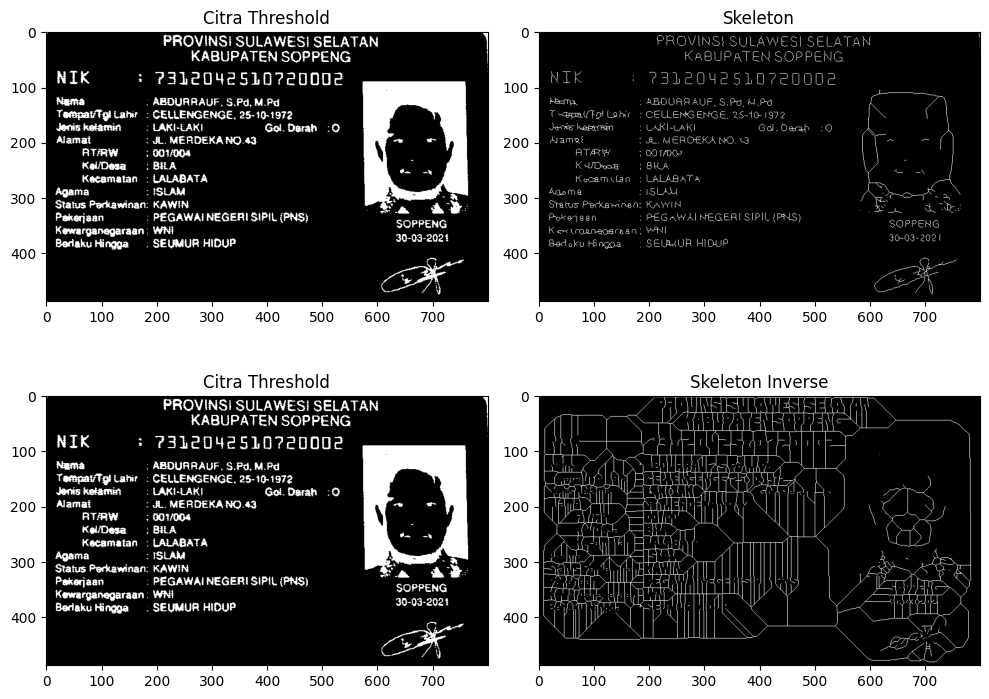

In [40]:
# Menghitung Skeleton
binary = thresh > 127  # Citra biner
skeleton = skeletonize(binary)
skeleton_inv = skeletonize(~binary)  # Inverse Skeleton

# Menampilkan hasil
plt.figure(figsize=(10, 11))

# Menampilkan citra threshold
plt.subplot(3, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(3, 2, 2)
plt.imshow(skeleton, cmap='gray')
plt.title("Skeleton")

# Menampilkan citra threshold untuk Skeleton Inverse
plt.subplot(3, 2, 3)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(3, 2, 4)
plt.imshow(skeleton_inv, cmap='gray')
plt.title("Skeleton Inverse")

plt.tight_layout()  # Mengatur agar tampilan tidak bertumpuk
plt.show()

### Operasi Top-Hat

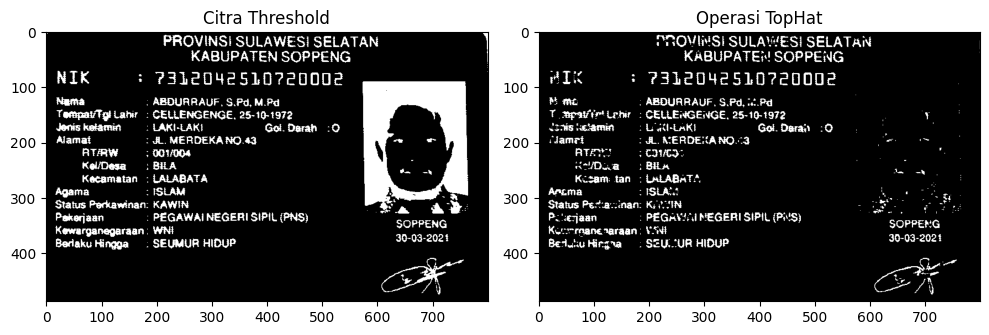

In [41]:
# Mengatur kernel untuk operasi TopHat
kernel = np.ones((5, 5), np.uint8)

# Operasi TopHat
tophat = cv2.morphologyEx(thresh, cv2.MORPH_TOPHAT, kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(1, 2, 2)
plt.imshow(tophat, cmap='gray')
plt.title("Operasi TopHat")

plt.tight_layout()
plt.show()

### Operasi Black-Hat

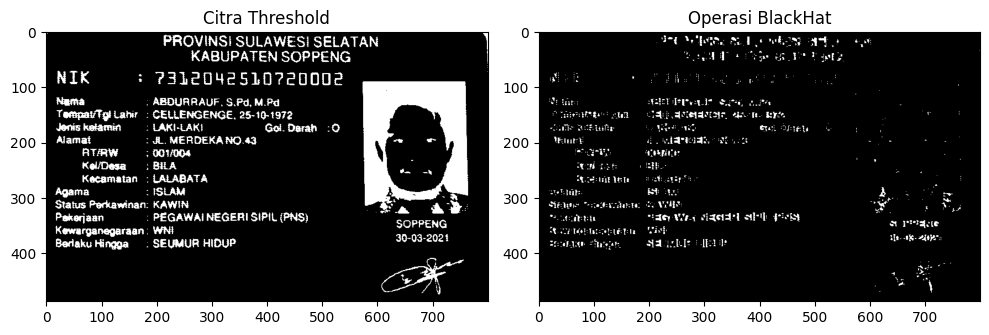

In [42]:
# Mengatur kernel untuk operasi BlackHat
kernel = np.ones((5, 5), np.uint8)

# Operasi BlackHat
blackhat = cv2.morphologyEx(thresh, cv2.MORPH_BLACKHAT, kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(1, 2, 2)
plt.imshow(blackhat, cmap='gray')
plt.title("Operasi BlackHat")

plt.tight_layout()
plt.show()

### Operasi Thickening

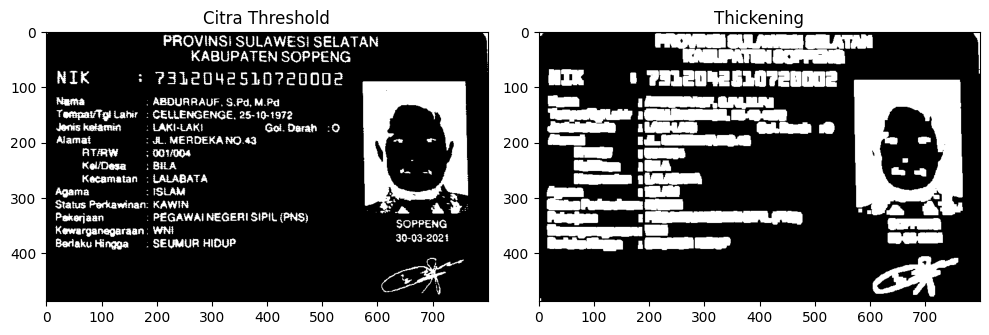

In [43]:
# Operasi Thickening menggunakan dilasi berulang
kernel = np.ones((3, 3), np.uint8)
thickened = cv2.dilate(thresh, kernel, iterations=3)  # Dilasi berulang

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(1, 2, 2)
plt.imshow(thickened, cmap='gray')
plt.title("Thickening")

plt.tight_layout()
plt.show()

### Menggunakan library morfologi CV2

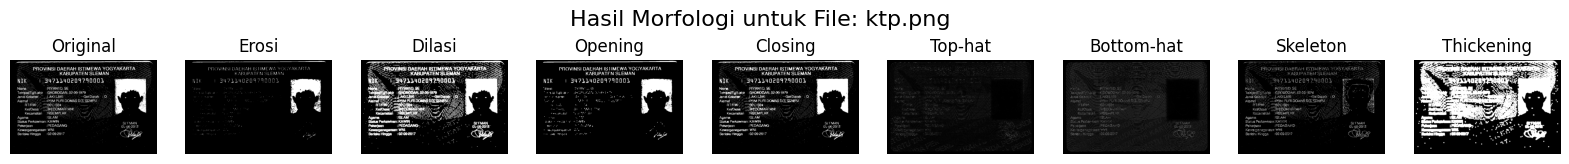

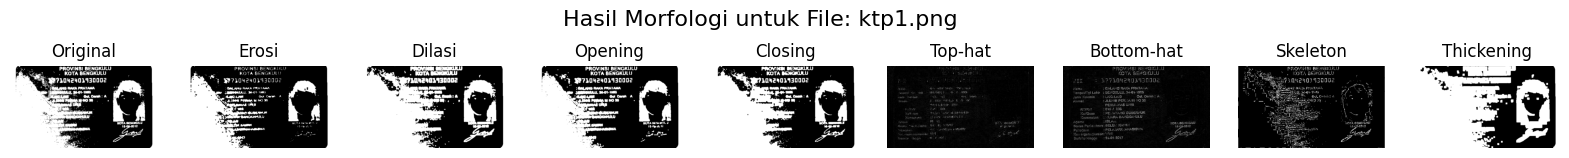

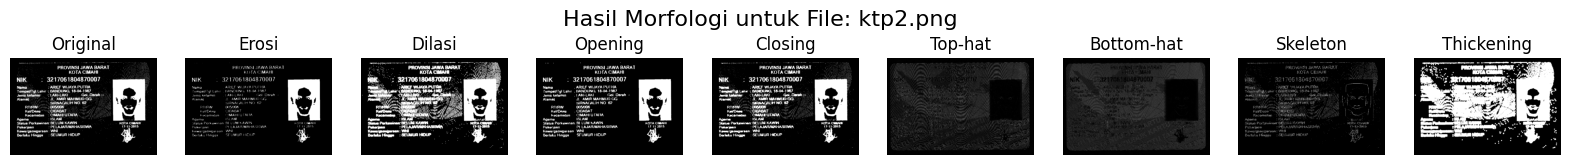

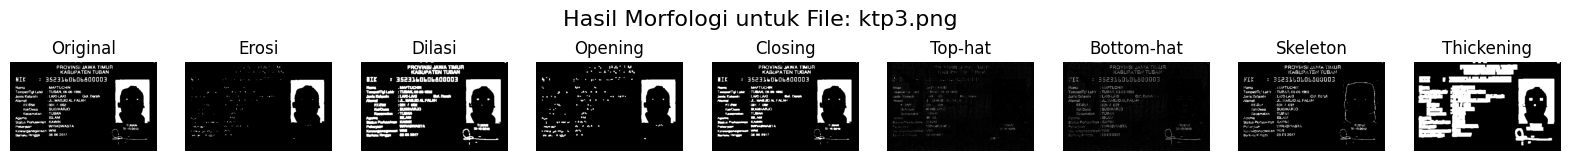

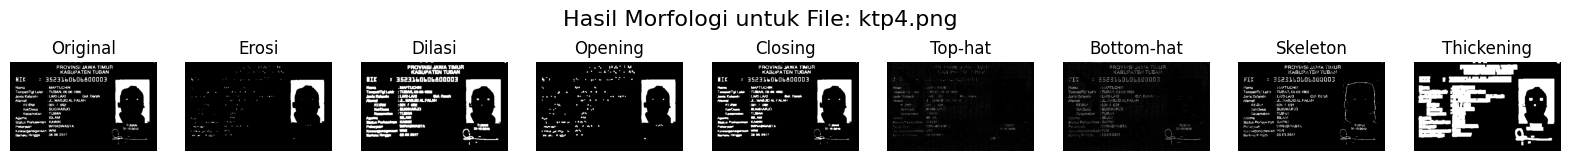

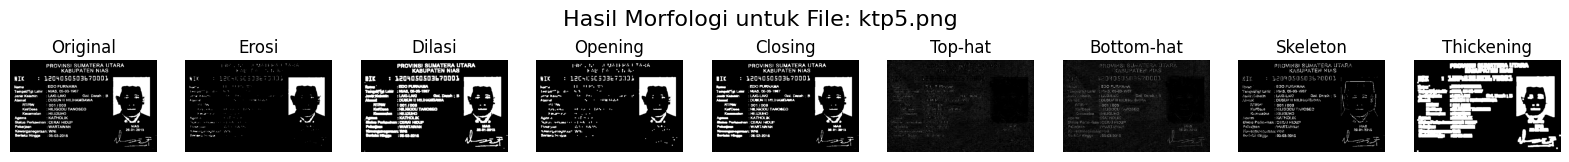

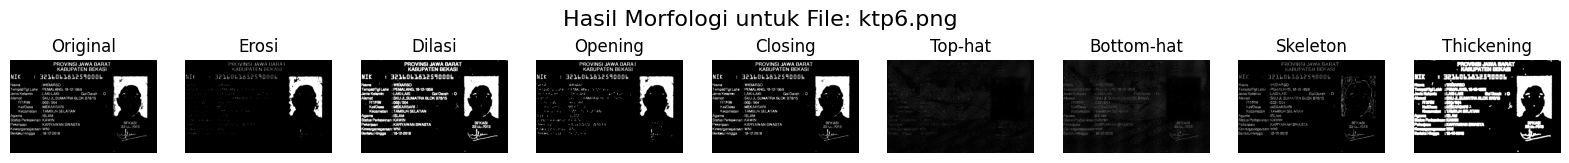

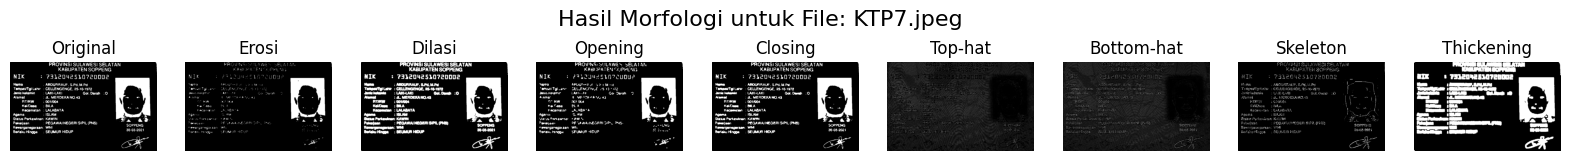

In [56]:
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

# Load image paths
image_paths = glob.glob('/content/drive/MyDrive/PCVK/KTP_More/KTP_More/*')

# Iterasi pada setiap gambar di path
for img_path in image_paths:
    # Mendapatkan nama file
    file_name = os.path.basename(img_path)

    # Membaca gambar dalam grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Thresholding untuk meningkatkan kontras
    _, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

    # Membuat kernel untuk operasi morfologi
    kernel = np.ones((3, 3), np.uint8)

    # Menggunakan semua teknik morfologi
    results = [
        ("Original", binary),
        ("Erosi", cv2.erode(binary, kernel, iterations=1)),
        ("Dilasi", cv2.dilate(binary, kernel, iterations=1)),
        ("Opening", cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)),
        ("Closing", cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)),
        ("Top-hat", cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)),
        ("Bottom-hat", cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel))
    ]

    # Skeletonization
    skeleton = np.zeros_like(binary)
    temp_img = binary.copy()
    while True:
        eroded = cv2.erode(temp_img, kernel)
        temp = cv2.dilate(eroded, kernel)
        temp = cv2.subtract(temp_img, temp)
        skeleton = cv2.bitwise_or(skeleton, temp)
        temp_img = eroded.copy()
        if cv2.countNonZero(temp_img) == 0:
            break
    results.append(("Skeleton", skeleton))

    # Thickening (Dilasi berulang)
    thickening = cv2.dilate(binary, kernel, iterations=3)
    results.append(("Thickening", thickening))

    # Menampilkan hasil dalam satu baris horizontal
    fig, axes = plt.subplots(1, len(results), figsize=(20, 2))
    fig.suptitle(f'Hasil Morfologi untuk File: {file_name}', fontsize=16)

    for ax, (title, result) in zip(axes, results):
        ax.imshow(result, cmap='gray')
        ax.set_title(title)
        ax.axis('off')

    plt.show()